<a href="https://colab.research.google.com/github/BahodirML/Technocollabs_intern/blob/main/Item_Outlet_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('/content/Train.csv')
test = pd.read_csv('/content/Test.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.shape

(8523, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##The file contains the following columns:

Item_Identifier: unique product ID

Item_Weight: weight of product

Item_Fat_Content: whether the product is low fat or regular

Item_Visibility: the percentage of total display area of all products in a store allocated to the particular product

Item_Type: the category to which the product belongs

Item_MRP: maximum retail price of the product

Outlet_Identifier: unique store ID

Outlet_Establishment_Year: the year in which the store was established

Outlet_Size: the size of the store in terms of ground area covered

Outlet_Location_Type: the type of city in which the store is located

Outlet_Type: whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales: sales of the product in the particular store. This is the target variable.

#Treating missing values

In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
dropped = df.dropna()
dropped.shape

(4650, 12)

##As it's seen if we drop the NaN values we will lose more than half part of our dataset. So, we need to go on with other ways. Firstly, we need to correct some values:

In [7]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [8]:
# replace incorrect values with correct ones using a dictionary
fat_content_dict = {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(fat_content_dict)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [9]:
df.groupby(['Item_Type', 'Item_Fat_Content']).mean()

<ipython-input-9-c5a2ee088b20>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Item_Type', 'Item_Fat_Content']).mean()


Item_Weight  Item_Visibility  \
Item_Type             Item_Fat_Content                                 
Baking Goods          Low Fat             12.552996         0.066150   
                      Regular             12.013303         0.072283   
Breads                Low Fat             12.429912         0.067815   
                      Regular             10.002143         0.064287   
Breakfast             Low Fat             11.849412         0.091970   
                      Regular             13.336182         0.082011   
Canned                Low Fat             11.864650         0.072913   
                      Regular             12.804289         0.062833   
Dairy                 Low Fat             13.391497         0.069884   
                      Regular             13.483797         0.076454   
Frozen Foods          Low Fat             12.580333         0.059118   
                      Regular             13.180539         0.072880   
Fruits and Vegetables Low Fat             12.757046         0.066488   
                      Regular             13.708363         0.070632   
Hard Drinks           Low Fat             11.400328         0.064943   
Health and Hygiene    Low Fat             13.142314         0.055216   
Household             Low Fat             13.384736         0.061322   
Meat                  Low Fat             13.565644         0.056635   
                      Regular             12.335512         0.066050   
Others                Low Fat             13.853285         0.060241   
Seafood               Low Fat             13.805345         0.049211   
                      Regular             10.901818         0.110284   
Snack Foods           Low Fat             13.707177         0.069842   
                      Regular             12.027116         0.062774   
Soft Drinks           Low Fat             11.963444         0.062768   
                      Regular             11.228220         0.070315   
Starchy Foods         Low Fat             13.752432         0.066658   
                      Regular             13.609196         0.068688   

                                          Item_MRP  Outlet_Establishment_Year  \
Item_Type             Item_Fat_Content                                          
Baking Goods          Low Fat           120.525869                1997.310030   
                      Regular           132.419203                1998.159875   
Breads                Low Fat           134.582184                1997.592857   
                      Regular           148.987514                1997.738739   
Breakfast             Low Fat           165.259673                1997.292683   
                      Regular           127.841304                1997.362319   
Canned                Low Fat           139.552518                1998.372434   
                      Regular           139.997787                1997.909091   
Dairy                 Low Fat           147.115989                1997.772727   
                      Regular           150.689305                1997.537879   
Frozen Foods          Low Fat           139.019490                1997.828889   
                      Regular           137.931307                1998.241379   
Fruits and Vegetables Low Fat           136.558069                1997.695238   
                      Regular           152.977571                1997.745847   
Hard Drinks           Low Fat           137.077928                1998.177570   
Health and Hygiene    Low Fat           130.818921                1997.734615   
Household             Low Fat           149.424753                1997.784615   
Meat                  Low Fat           130.998788                1997.311765   
                      Regular           145.804195                1997.360784   
Others                Low Fat           132.851430                1997.662722   
Seafood               Low Fat           113.508557                1997.189189   
                

In [10]:
# compute mean of Item_Weight for each Item_Identifier
item_means = df.groupby(['Item_Type', 'Item_Fat_Content'])['Item_Weight'].mean()



In [11]:
#filling NaN values:
df.loc[df['Item_Weight'].isnull(), 'Item_Weight'] = df.loc[df['Item_Weight'].isnull(), ['Item_Type', 'Item_Fat_Content']].apply(lambda x: item_means[x['Item_Type'], x['Item_Fat_Content']], axis=1)


In [12]:
df.isnull().sum()


Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#Now our next task is to treat the "Outlet_Size" column

In [13]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [14]:
df['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [15]:
#filling NaN values with mode method
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [16]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Now we have a full dataset without any missing values

In [17]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##Visualizing the dataset

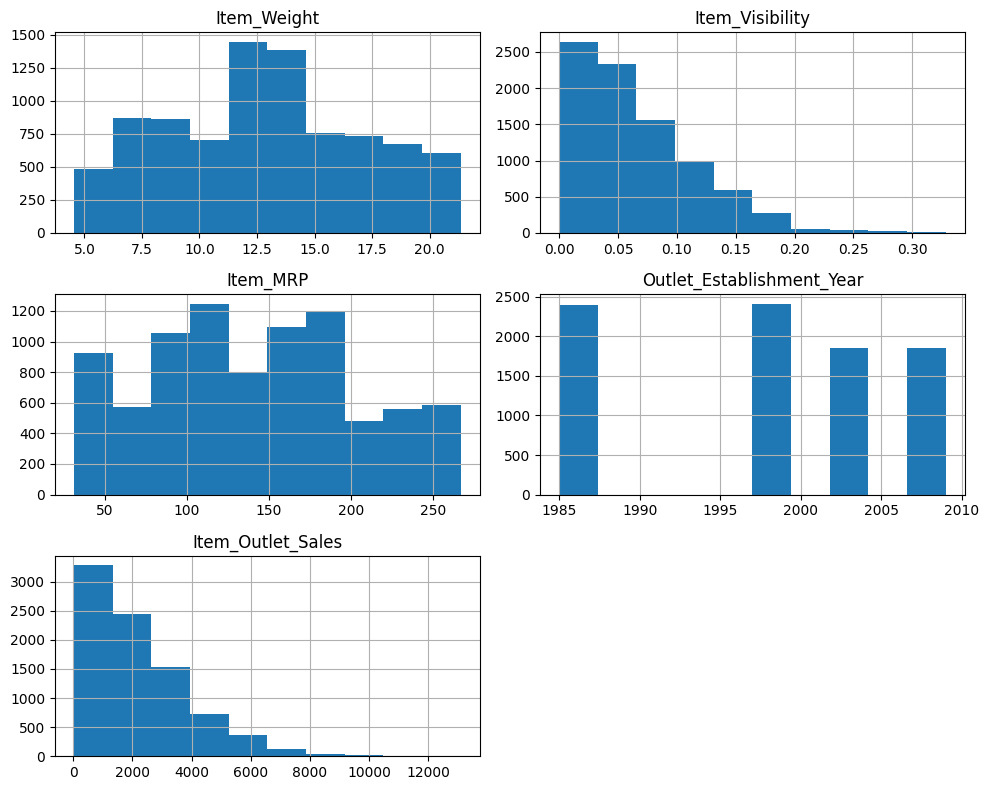

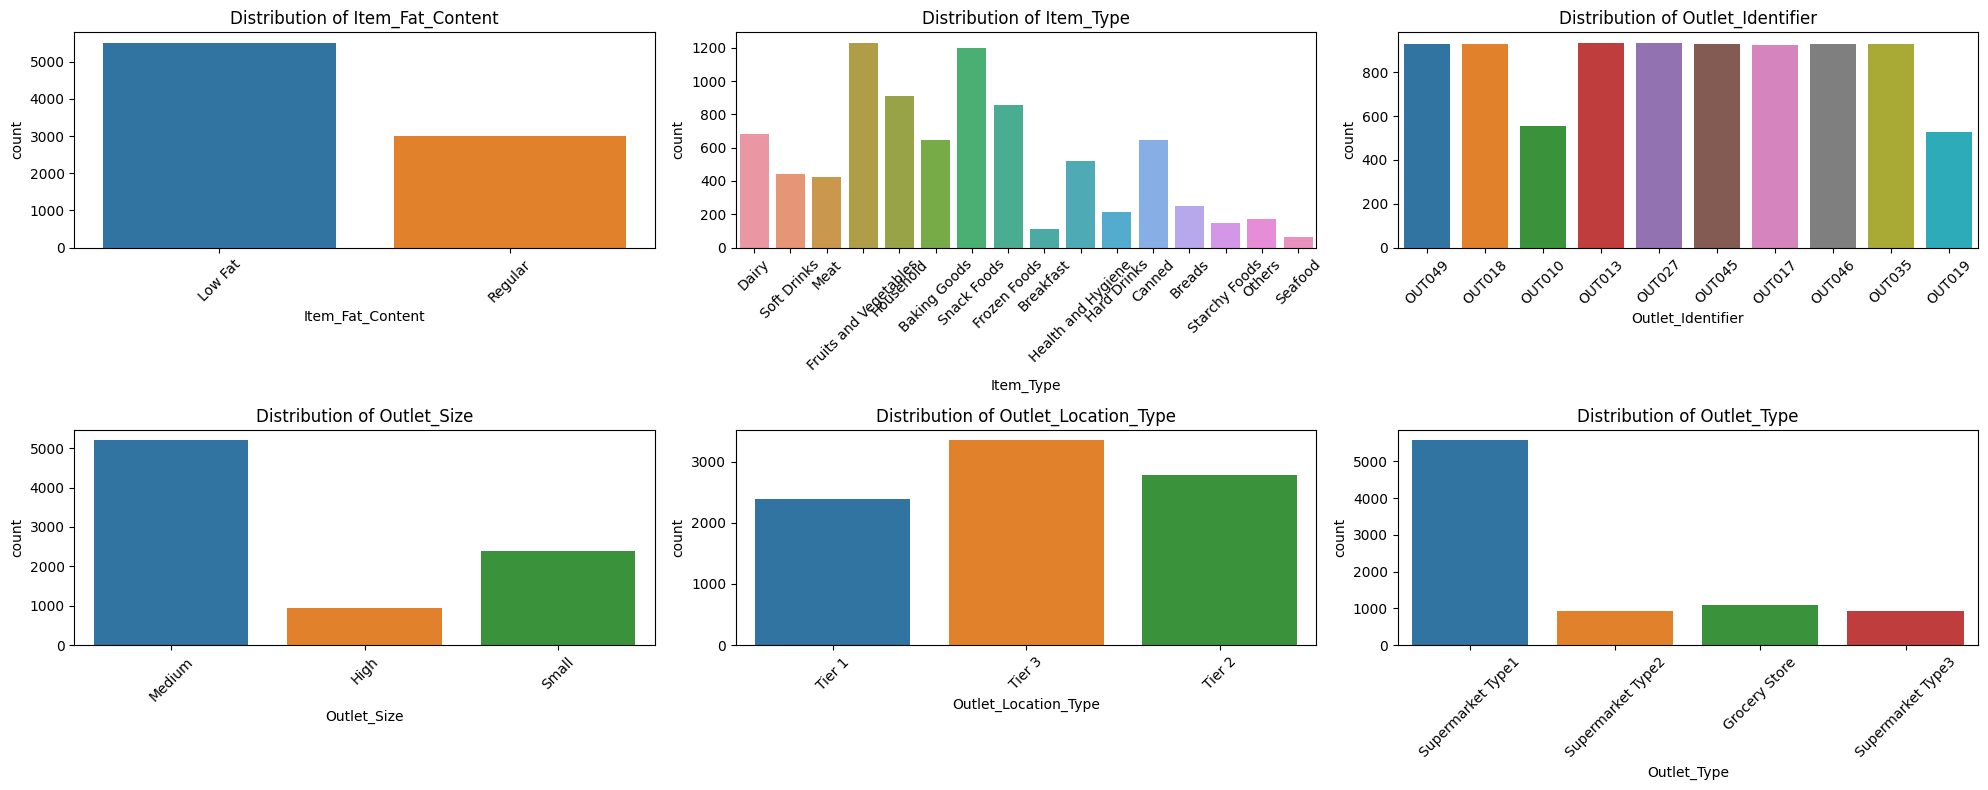

In [18]:
# Histograms for numeric variables
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# List of categorical variables
categorical_vars = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Bar plots for categorical variables
fig, axes = plt.subplots(2, 3, figsize=(20, 8))

for idx, col in enumerate(categorical_vars):
    row = idx // 3
    col_idx = idx % 3
    sns.countplot(x=col, data=df, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Distribution of {col}')
    axes[row, col_idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [19]:
df.corrwith(df['Item_Outlet_Sales']).abs().sort_values(ascending=False)

<ipython-input-19-70b167dfeeac>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['Item_Outlet_Sales']).abs().sort_values(ascending=False)


Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Visibility              0.128625
Outlet_Establishment_Year    0.049135
Item_Weight                  0.012523
dtype: float64

#Feature engineering

In [20]:

# Remove the first two characters from the Item_Identifier to create a new variable
df['Item_Type_Combined'] = df['Item_Identifier'].apply(lambda x: x[0:2])

# Create a new variable for the years of operation of a store
df['Years_of_Operation'] = df['Outlet_Establishment_Year'].apply(lambda x: 2023 - x)


In [21]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Years_of_Operation
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,24
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FD,25
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,36


In [22]:
#Drop unnecessary columns
df.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Item_Type'], axis=1, inplace=True)


## Label Encoding

In [24]:
label_encoder = LabelEncoder()

cat= ("Item_Fat_Content","Outlet_Size","Outlet_Location_Type","Outlet_Type", "Item_Type_Combined")
for i in cat:
    label_encoder= LabelEncoder()
    df[i]= label_encoder.fit_transform(df[i].values)

df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Years_of_Operation
0,9.300,0,0.016047,249.8092,1,0,1,3735.1380,1,24
1,5.920,1,0.019278,48.2692,1,2,2,443.4228,0,14
2,17.500,0,0.016760,141.6180,1,0,1,2097.2700,1,24
3,19.200,1,0.000000,182.0950,1,2,0,732.3800,1,25
4,8.930,0,0.000000,53.8614,0,2,1,994.7052,2,36
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,0,2,1,2778.3834,1,36
8519,8.380,1,0.046982,108.1570,1,1,1,549.2850,1,21
8520,10.600,0,0.035186,85.1224,2,1,1,1193.1136,2,19
8521,7.210,1,0.145221,103.1332,1,2,2,1845.5976,1,14


## Preprosessing

In [25]:

#Spliting the data
scaler = StandardScaler()
X = df.drop('Item_Outlet_Sales', axis=1)

X_scaled = scaler.fit_transform(X)
y = df['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Modelling: Linear Regression

In [27]:

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)
mae_lr = round(mean_absolute_error(y_test,y_pred))
mse_lr= mean_squared_error(y_test, y_pred)
rmse_lr = round(np.sqrt(mse_lr))
r2_lr = round(model_lr.score(X_train,y_train) * 100,2)

print(f"MAE: {mae_lr}")
print(f"RMSE: {rmse_lr}")
print(f"R-squared: {r2_lr}")


MAE: 856
RMSE: 1137
R-squared: 50.38


## Lasso Regression

In [29]:

lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
mae_las = round(mean_absolute_error(y_test,y_pred))
mse_las = mean_squared_error(y_test, y_pred)
rmse_las = round(np.sqrt(mse_las))
r2_las = round(lasso.score(X_train,y_train) * 100,2)

print(f"MAE: {mae_las}")
print(f"RMSE: {rmse_las}")
print(f"R-squared: {r2_las}")

MAE: 856
RMSE: 1137
R-squared: 50.38


# RandomForest Regression

In [31]:
# Hyperparameter tuning for RandomForestRegressor
rf_params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(rf, rf_params, scoring='neg_mean_squared_error', cv=3, n_iter=10, verbose=0, random_state=42)
rf_random.fit(X_train, y_train)

print("Best parameters for RandomForestRegressor: ", rf_random.best_params_)


Best parameters for RandomForestRegressor:  {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 5}


In [32]:
rf = RandomForestRegressor(n_estimators= 400, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mae_rf = round(mean_absolute_error(y_test,y_pred))
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = round(np.sqrt(mse_rf))
r2_rf = round(rf.score(X_train,y_train) * 100,2)

print(f"MAE: {mae_rf}")
print(f"RMSE: {rmse_rf}")
print(f"R-squared: {r2_rf}")


MAE: 758
RMSE: 1084
R-squared: 93.91


## XGBoost

In [35]:
# Hyperparameter tuning for XGBoost
xgb_params = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9]
}

xgb = XGBRegressor(random_state=42)
xgb_random = RandomizedSearchCV(xgb, xgb_params, scoring='neg_mean_squared_error', cv=3, n_iter=10, verbose=0, random_state=42)
xgb_random.fit(X_train, y_train)

print("Best parameters for XGBoost: ", xgb_random.best_params_)



Best parameters for XGBoost:  {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.5}


#Final steps: Working with test data

In [37]:
test.shape

(5681, 11)

In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [39]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [40]:
test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [41]:
# replace incorrect values with correct ones using a dictionary
fat_content_dict = {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(fat_content_dict)
test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [42]:
# compute mean of Item_Weight for each Item_Identifier
item_means = test.groupby(['Item_Type', 'Item_Fat_Content'])['Item_Weight'].mean()

# fill NaN values with mean weights using loc
test.loc[test['Item_Weight'].isnull(), 'Item_Weight'] = test.loc[test['Item_Weight'].isnull(), ['Item_Type', 'Item_Fat_Content']].apply(lambda x: item_means[x['Item_Type'], x['Item_Fat_Content']], axis=1)



In [43]:
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0], inplace=True)

In [44]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [45]:
# Extract the first two characters from the Item_Identifier to create a new variable
test['Item_Type_Combined'] = test['Item_Identifier'].apply(lambda x: x[0:2])

# Create a new variable for the years of operation of a store
test['Years_of_Operation'] = test['Outlet_Establishment_Year'].apply(lambda x: 2023 - x)


In [46]:
#Drop unnecessary columns
test.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Item_Type'], axis=1, inplace=True)


In [47]:
#Label Encoding
le = LabelEncoder()

cat= ("Item_Fat_Content","Outlet_Size","Outlet_Location_Type","Outlet_Type", "Item_Type_Combined")
for i in cat:
    le= LabelEncoder()
    test[i]= le.fit_transform(test[i].values)

test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined,Years_of_Operation
0,20.750000,0,0.007565,107.8622,1,0,1,1,24
1,8.300000,1,0.038428,87.3198,1,1,1,1,16
2,14.600000,0,0.099575,241.7538,1,2,0,2,25
3,7.315000,0,0.015388,155.0340,1,1,1,1,16
4,12.390955,1,0.118599,234.2300,1,2,3,1,38
...,...,...,...,...,...,...,...,...,...
5676,10.500000,1,0.013496,141.3154,2,0,1,1,26
5677,7.600000,1,0.142991,169.1448,1,2,2,1,14
5678,10.000000,0,0.073529,118.7440,1,1,1,2,21
5679,15.300000,1,0.000000,214.6218,1,1,1,1,16


In [54]:

#PreProcessing
scaler = StandardScaler()

X_testt = scaler.fit_transform(test)

In [55]:
test_pred = rf.predict(X_testt)

In [59]:
test['Sales_Prediction'] = test_pred
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined,Years_of_Operation,Sales_Prediction
0,20.750000,0,0.007565,107.8622,1,0,1,1,24,1703.221264
1,8.300000,1,0.038428,87.3198,1,1,1,1,16,1443.514322
2,14.600000,0,0.099575,241.7538,1,2,0,2,25,565.134369
3,7.315000,0,0.015388,155.0340,1,1,1,1,16,2506.222669
4,12.390955,1,0.118599,234.2300,1,2,3,1,38,7114.182857


In [60]:
df.to_csv('Item_outlet_sales_prediction.csv', index=False)